In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('shark_clean.csv')

In [4]:
df.head()

,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Sex,Injury,Fatal (Y/N),Time,Species
0,0,09-Oct-2020,2020.0,Unprovoked,AUSTRALIA,Western Australia,Kelp Beds Beach (Kelpies),Surfing,M,Fatal,Y,10h45,Not Available
1,1,07-Oct-2020,2020.0,Unprovoked,USA,Florida,"Miami Beach, Miami-Dade County",Body Surfing,M,Survived,N,Afternoon,Blacktip shark
2,2,04-Oct-2020,2020.0,Unprovoked,AUSTRALIA,Western Australia,"Toms Surf break, Hamersley Pool, North Beach, ...",Surfing,M,No Injury,N,10h45,Bronze whaler 1.5m
3,4,20-Sep-2020,2020.0,Unprovoked,USA,Florida,"Sombero Key Light, Monroe County",Snorkeling,M,Survived,N,10h30,Bull shark
4,5,17-Sep-2020,2020.0,Provoked,AUSTRALIA,Queensland,Fraser Island,Fishing,M,Survived,N,16h00,"""whitetip shark"""


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Attaks per year

In [10]:
total_year =  df.groupby('Year').count()

In [15]:
total_year.reset_index(inplace=True)

In [21]:
total_year = total_year[108:]

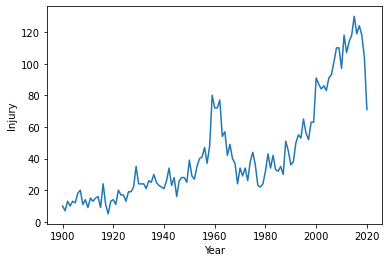

In [22]:
sns.lineplot(x='Year', y='Injury', data=total_year)